In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import gymnasium as gym
from gymnasium import spaces
from gymnasium.utils.save_video import save_video
import numpy as np
import pickle
from matplotlib import cm
from matplotlib import animation
import pylab as plt

import DDPG
import TD3
import torch

cuda
cuda


In [20]:
frames = np.load('frames.npy')

In [23]:
frames.shape

(480, 600, 3)

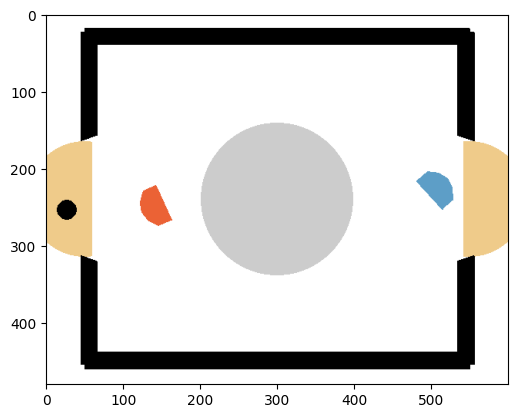

In [24]:
# Show the image in the first frame
plt.imshow(frames)

## Helper Functions

In [3]:
def running_mean(x, N):
    cumsum = np.cumsum(np.insert(x, 0, 0)) 
    return (cumsum[N:] - cumsum[:-N]) / float(N)    

In [4]:
def save_frames_as_gif(frames, path='./', filename='gym_animation.gif'):
    print(f"Saving {len(frames)} frames as gif")
    #Mess with this to change frame size
    dpi=50
    plt.figure(figsize=(frames[0].shape[1] / float(dpi), frames[0].shape[0] / float(dpi)), dpi=dpi)

    patch = plt.imshow(frames[0])
    plt.axis('off')

    def animate(i):
        patch.set_data(frames[i])

    anim = animation.FuncAnimation(plt.gcf(), animate, frames = len(frames), interval=10)
    anim.save(path + filename, writer='imagemagick', fps=30)

In [5]:
def run(env, agent, n_episodes=100, noise=0):
    rewards = []
    observations = []
    actions = []
    for ep in range(1, n_episodes+1):
        ep_reward = 0
        state, _info = env.reset()
        step_starting_index = 0
        for t in range(2000):
            action = agent.act(state, noise)
            state, reward, done, _trunc, _info = env.step(action)
            observations.append(state)
            actions.append(action)
            ep_reward += reward
            if done or _trunc:
                frames = env.render()
                save_frames_as_gif(frames)
                break
        rewards.append(ep_reward)
        ep_reward = 0
    print(f'Mean reward: {np.mean(rewards)}')
    observations = np.asarray(observations)
    actions = np.asarray(actions)
    return observations, actions, rewards

# Visualizing on one episode

In [12]:
env_name = "LunarLander-v2"
agent_name = "TD3"

results_dir="./results_0"
eps=0.1
ts=32
lr=0.0001
s=42

with open(f"{results_dir}/{agent_name}_{env_name}-eps{eps}-t{ts}-l{lr}-s{s}-stat.pkl", 'rb') as f:
    data = pickle.load(f)
    rewards = np.asarray(data["rewards"])
    losses =  np.asarray(data["losses"])

FileNotFoundError: [Errno 2] No such file or directory: './results_0/TD3_LunarLander-v2-eps0.1-t32-l0.0001-s42-stat.pkl'

In [ ]:
episodes = 9500
checkpoint = f"{results_dir}/{agent_name}_{env_name}_{episodes}-eps{eps}-t{ts}-l{lr}-s{s}.pth"

In [ ]:
render_mode = "rgb_array_list"
if env_name == "LunarLander-v2":
    env = gym.make(env_name, continuous=True, render_mode=render_mode)
else:
    env = gym.make(env_name, render_mode=render_mode)

In [ ]:
if agent_name == "TD3":
    agent_class = TD3.TD3Agent
elif agent_name == "DDPG":
    agent_class = DDPG.DDPGAgent

In [13]:
ddpg = agent_class(env.observation_space, env.action_space, eps=eps, learning_rate_actor=lr,
                       update_target_every=100)
state = torch.load(checkpoint)
ddpg.restore_state(state)

MovieWriter imagemagick unavailable; using Pillow instead.


Saving 227 frames as gif
Mean reward: -99.67895499724567


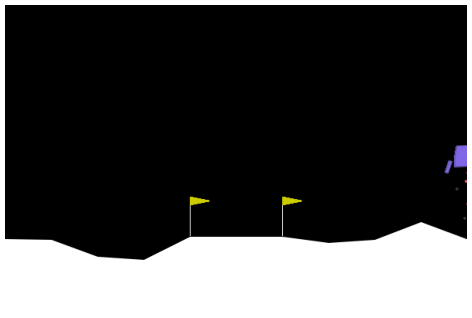

In [14]:
obs, actions, rewards = run(env, ddpg, n_episodes=1, noise=0.0)

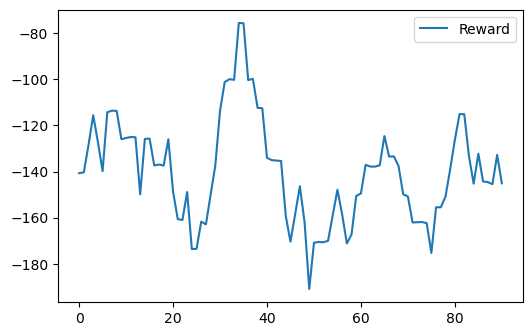

In [13]:
fig=plt.figure(figsize=(6,3.8))
plt.plot(running_mean(rewards, 10),label=f"Reward")
plt.legend()

## HalfCheetah

In [5]:
env_name = "HalfCheetah-v4"
agent = "TD3"
episodes=10000
eps=0.1
ts=32
lr=0.0001
s=42

checkpoint = f"./results/{agent}_{env_name}_{episodes}-eps{eps}-t{ts}-l{lr}-s{s}.pth"

In [12]:
with open(f"./results/DDPG_{env_name}-eps{eps}-t{ts}-l{lr}-s{s}-stat.pkl", 'rb') as f:
    data = pickle.load(f)
    rewards = np.asarray(data["rewards"])
    losses =  np.asarray(data["losses"])

# Cheetah train stats

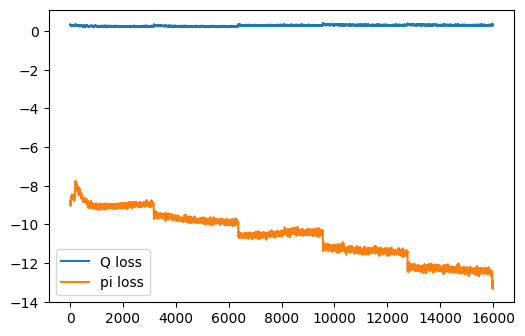

In [13]:
fig=plt.figure(figsize=(6,3.8))
plt.plot(running_mean(losses[:,0],10),label=f"Q loss")
plt.plot(running_mean(losses[:,1],10),label=f"pi loss")
plt.legend()

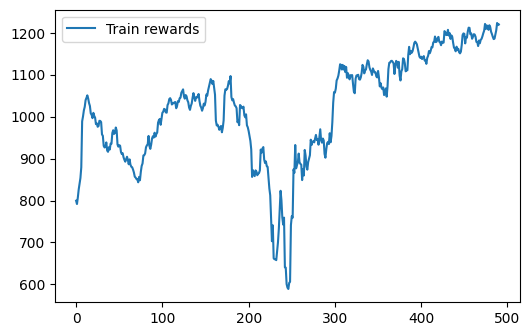

In [14]:
fig=plt.figure(figsize=(6,3.8))
plt.plot(running_mean(rewards,10),label=f"Train rewards")
plt.legend()

# Cheetah testing

In [7]:
render_mode="human"
env = gym.make(env_name, render_mode=render_mode)

In [9]:
ddpg = DDPG.DDPGAgent(env.observation_space, env.action_space, eps=eps, learning_rate_actor=lr,
                       update_target_every=100)
state = torch.load(checkpoint, map_location=torch.device('cpu')
ddpg.restore_state(state)

SyntaxError: invalid syntax (535804301.py, line 4)

In [10]:
obs, actions, rewards = run(env, ddpg, n_episodes=10, noise=0.0)

AttributeError: 'HalfCheetahEnv' object has no attribute 'monitor'

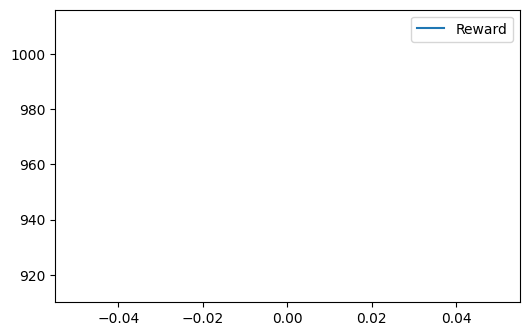

In [18]:
fig=plt.figure(figsize=(6,3.8))
plt.plot(running_mean(rewards, 10),label=f"Reward")
plt.legend()